In [26]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv("/content/Churn_Modelling.csv")
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [46]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


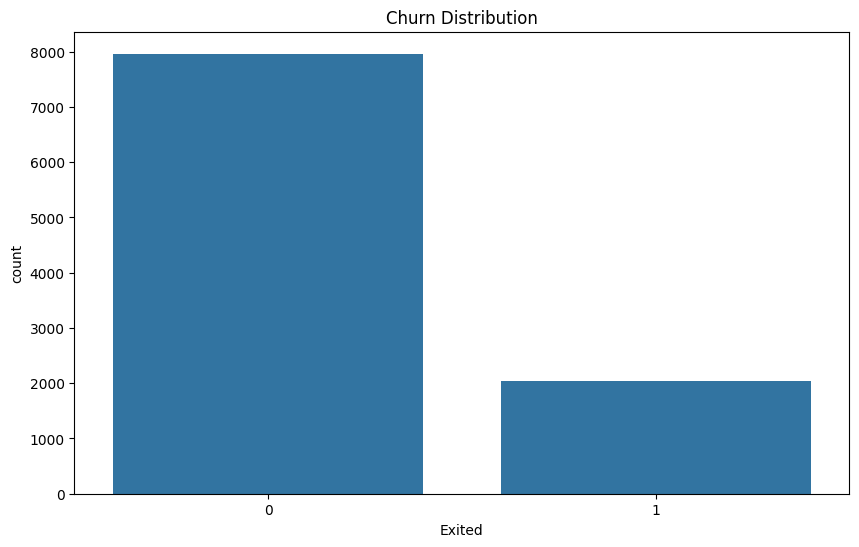

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x='Exited', data=df)
plt.title("Churn Distribution")
plt.show()
print(df['Exited'].value_counts(normalize=True) * 100)


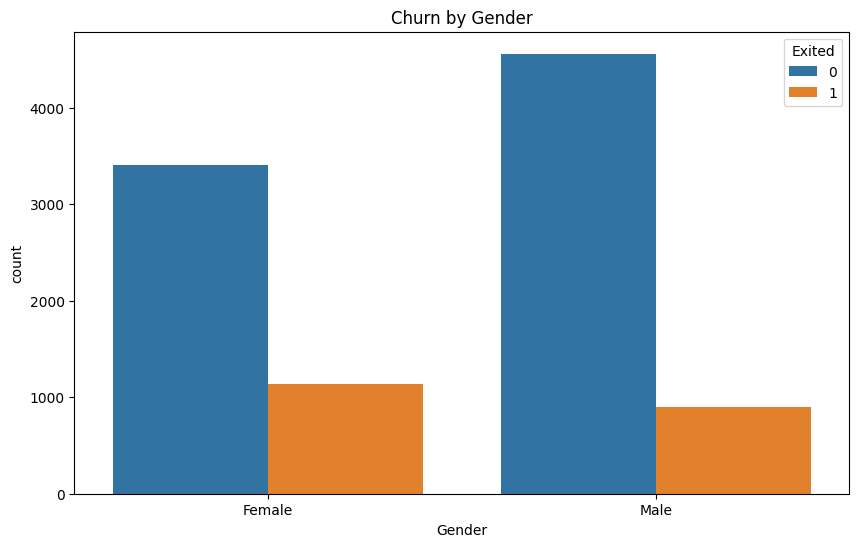

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title("Churn by Gender")
plt.show()


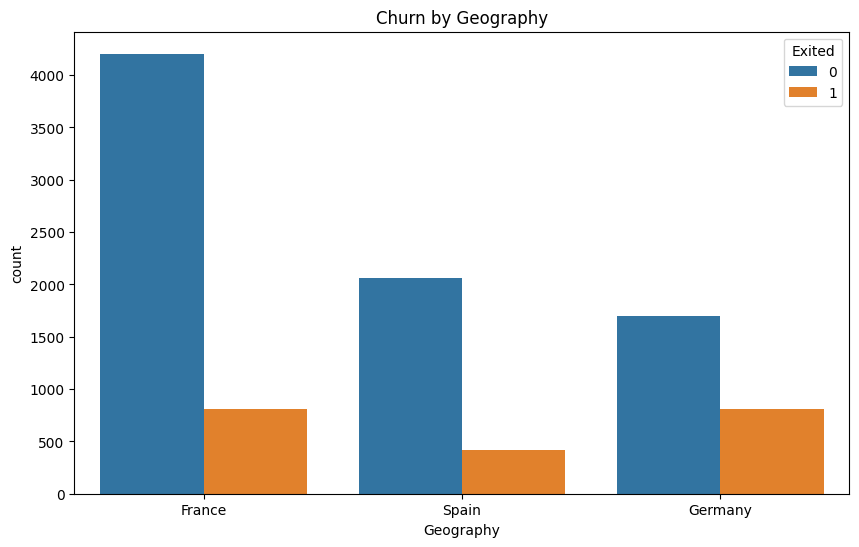

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title("Churn by Geography")
plt.show()


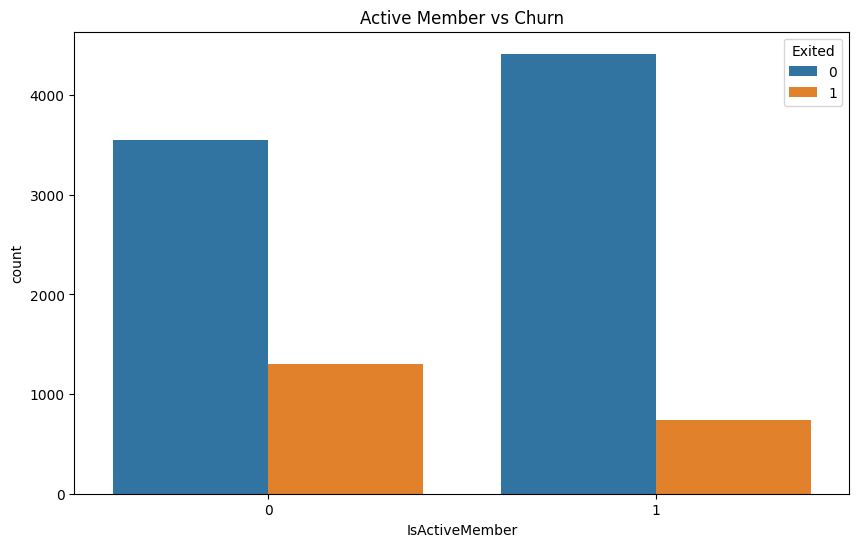

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x='IsActiveMember', hue='Exited', data=df)
plt.title("Active Member vs Churn")
plt.show()


**Feature Engineering**


In [35]:
y = df['Exited']
X = df.drop('Exited', axis=1)


In [36]:
X['Balance_per_product'] = X['Balance'] / (X['NumOfProducts'] + 1)

In [38]:
X['AgeGroup'] = pd.cut(
    X['Age'],
    bins=[0,30,40,50,60,120],
    labels=[1,2,3,4,5],
    include_lowest=True
)
X['AgeGroup'] = X['AgeGroup'].cat.codes


In [29]:
num_cols = ['CreditScore','Age','Tenure','Balance',
            'EstimatedSalary','Balance_per_product']

scaler = StandardScaler()

X[num_cols] = scaler.fit_transform(X[num_cols])


In [39]:
X = pd.get_dummies(X, columns=['Geography','Gender'], drop_first=True)

In [49]:
print(X.dtypes)

CreditScore              int64
Age                      int64
Tenure                   int64
Balance                float64
NumOfProducts            int64
HasCrCard                int64
IsActiveMember           int64
EstimatedSalary        float64
Balance_per_product    float64
AgeGroup                  int8
Geography_Germany         bool
Geography_Spain           bool
Gender_Male               bool
dtype: object


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [51]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("Before SMOTE:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", y_train_res.value_counts())


Before SMOTE:
 Exited
0    6370
1    1630
Name: count, dtype: int64

After SMOTE:
 Exited
1    6370
0    6370
Name: count, dtype: int64


**MODEL BUILDING**

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


Random Forest Report
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1593
           1       0.57      0.61      0.59       407

    accuracy                           0.83      2000
   macro avg       0.73      0.75      0.74      2000
weighted avg       0.83      0.83      0.83      2000

AUC Score: 0.8371715320867864


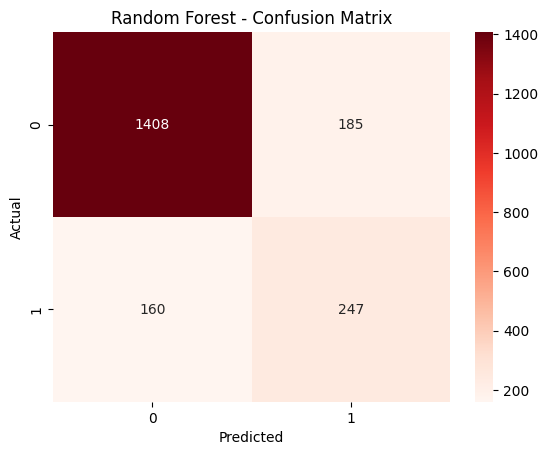

In [ ]:
rf = RandomForestClassifier(n_estimators=200,random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]
print("Random Forest Report")
print(classification_report(y_test, y_pred_rf))
print("AUC Score:", roc_auc_score(y_test, y_prob_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

Logistic Regression Report
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1593
           1       0.38      0.54      0.44       407

    accuracy                           0.73      2000
   macro avg       0.62      0.66      0.63      2000
weighted avg       0.77      0.73      0.74      2000

AUC Score: 0.7196919569800925


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


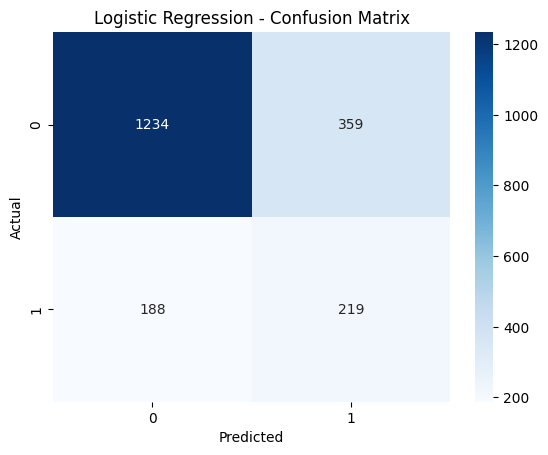

In [ ]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_res, y_train_res)
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]
print("Logistic Regression Report")
print(classification_report(y_test, y_pred_lr))
print("AUC Score:", roc_auc_score(y_test, y_prob_lr))
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
